------------------
## 1. 전처리 과정
-----------------
### 1) 모듈 설치와 모델 살펴보기

In [4]:
# warning 방지
import warnings
warnings.filterwarnings("ignore")

# 모듈 준비
import pandas as pd
import numpy as np

# 전처리
import missingno as msno

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline   
import matplotlib.pyplot as plt 
import seaborn as sns  

In [5]:
#원본 데이터 불러오기
data_df = pd.read_csv('titanic.csv')
data_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
data_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


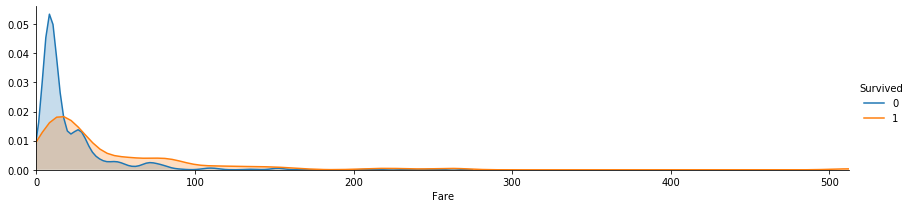

In [7]:
# 요금 계산

import matplotlib.pyplot as plt
import seaborn as sns

grid = sns.FacetGrid(data_df, hue="Survived", aspect=4)
grid.map(sns.kdeplot, 'Fare', shade=True)
grid.set(xlim=(0, data_df['Fare'].max()))
grid.add_legend()

plt.show()

# Fare 변수는 유의미하다.

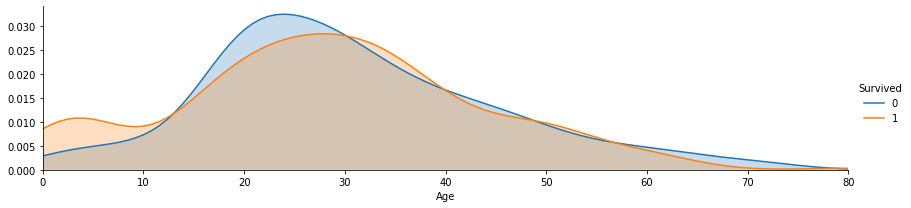

In [8]:
# 나이 계산

import matplotlib.pyplot as plt
import seaborn as sns

grid = sns.FacetGrid(data_df, hue="Survived", aspect=4)
grid.map(sns.kdeplot, 'Age', shade=True)
grid.set(xlim=(0, data_df['Age'].max()))
grid.add_legend()

plt.show()

#age 변수도 유의미한 변수이다.

------------------
## 1. 전처리 과정
-----------------
### 2) 연속적 데이터 --> 범주형 데이터

In [9]:
# 요금 구간 설정
data_df['Fare_qcut'] = pd.qcut(data_df.Fare, q=5, labels=[0, 1, 2, 3, 4])

In [10]:
data_df.Fare_qcut.value_counts().to_frame().style.background_gradient(cmap='summer')
# 데이터 프레임 Fare_qcut 열의 데이터 갯수를 데이터프레임으로 바꿔서 시각화

,Fare_qcut
1,184
3,180
0,179
4,176
2,172


In [11]:
data_df['Fare_qcut'].head()

0    0
1    4
2    1
3    4
4    1
Name: Fare_qcut, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [12]:
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_qcut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3


In [13]:
data_df["Sex"] = data_df["Sex"].apply(lambda x: 0  if x == "male" else 1  )
# 남자가 0 여자는 1

In [14]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_qcut
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


In [15]:
# 나이 구간 설정
data_df['Age_qcut'] = pd.qcut(data_df.Age, q=5, labels=[0, 1, 2, 3, 4])
data_df.Age_qcut.value_counts().to_frame().style.background_gradient(cmap='spring')

,Age_qcut
0,164
3,144
4,142
1,137
2,127


------------------
## 1. 전처리 과정
-----------------
### 3) 상관 관계 파악

In [16]:
data_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


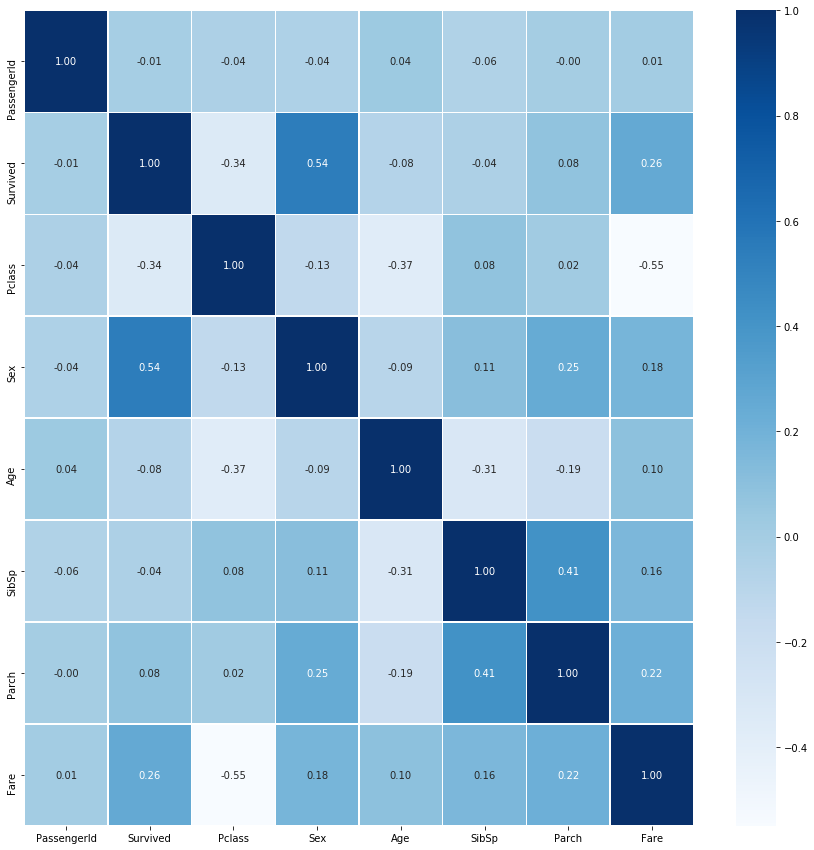

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
# 상관관계 시각화

In [18]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_qcut,Age_qcut
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,4,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,4,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,3


In [19]:
data_df["Family"] = data_df[["Parch", 'SibSp']].apply(lambda x: x.sum(), axis = 1  )
#parch 와 sibsp 를 합쳐서 새로운 family 변수의 저장

In [20]:
data_df = data_df.drop(['SibSp','Parch','Cabin','Embarked','PassengerId','Name','Ticket','Age','Fare'], axis=1)
#불필요한 열 제거


In [21]:
data_df

,Survived,Pclass,Sex,Fare_qcut,Age_qcut,Family
0,0,3,0,0,1,1
1,1,1,1,4,3,1
2,1,3,1,1,2,0
3,1,1,1,4,3,1
4,0,3,0,1,3,0
...,...,...,...,...,...,...
886,0,2,0,2,2,0
887,1,1,1,3,0,0
888,0,3,1,3,NaN,3
889,1,1,0,3,2,0


------------------
## 2. 결측치 처리
-----------------
### 1) GBM

In [22]:
data_df.isnull().sum() #결측치 확인

Survived       0
Pclass         0
Sex            0
Fare_qcut      0
Age_qcut     177
Family         0
dtype: int64

In [23]:
data_df


,Survived,Pclass,Sex,Fare_qcut,Age_qcut,Family
0,0,3,0,0,1,1
1,1,1,1,4,3,1
2,1,3,1,1,2,0
3,1,1,1,4,3,1
4,0,3,0,1,3,0
...,...,...,...,...,...,...
886,0,2,0,2,2,0
887,1,1,1,3,0,0
888,0,3,1,3,NaN,3
889,1,1,0,3,2,0


In [24]:
# nul
nullValue = data_df[data_df.Age_qcut.isnull()]
# len(nullValue)

In [25]:
nullValue = nullValue.drop(['Age_qcut'],axis=1)

In [26]:
#testX 추출
nullValue

,Survived,Pclass,Sex,Fare_qcut,Family
5,0,3,0,1,0
17,1,2,0,2,0
19,1,3,1,0,0
26,0,3,0,0,0
28,1,3,1,1,0
...,...,...,...,...,...
859,0,3,0,0,0
863,0,3,1,4,10
868,0,3,0,1,0
878,0,3,0,1,0


In [27]:
preTrain = data_df.dropna(axis=0)

In [28]:
trainAgeX = preTrain
testAgeX = nullValue

In [29]:
trainAgeY = trainAgeX['Age_qcut']

In [30]:
trainAgeX = trainAgeX.drop(['Age_qcut'],axis=1)

In [31]:
trainAgeX

,Survived,Pclass,Sex,Fare_qcut,Family
0,0,3,0,0,1
1,1,1,1,4,1
2,1,3,1,1,0
3,1,1,1,4,1
4,0,3,0,1,0
...,...,...,...,...,...
885,0,3,1,3,5
886,0,2,0,2,0
887,1,1,1,3,0
889,1,1,0,3,0


In [37]:
# 모델 학습시키기
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(trainAgeX,trainAgeY)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [38]:
# 결측치 예측 데이터
pred = gb.predict(testAgeX)
pred

array([1, 2, 1, 1, 0, 1, 4, 1, 1, 1, 1, 2, 1, 3, 4, 4, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 3, 1, 1, 0, 4, 4, 0, 0, 4, 4, 0, 1, 1, 0, 1, 1,
       0, 0, 2, 0, 1, 3, 1, 0, 4, 1, 3, 4, 4, 4, 1, 0, 3, 1, 3, 0, 0, 4,
       1, 0, 4, 1, 0, 0, 2, 1, 1, 4, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 0, 2,
       2, 1, 4, 1, 1, 3, 1, 1, 4, 3, 0, 2, 2, 2, 0, 4, 1, 2, 1, 1, 4, 1,
       0, 2, 2, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 4, 1, 0, 1, 1,
       3, 2, 3, 1, 1, 1, 1, 1, 4, 3, 1, 3, 1, 0, 4, 2, 1, 3, 1, 1, 4, 2,
       4, 2, 1, 1, 1, 0, 1, 0, 4, 3, 1, 2, 1, 1, 1, 4, 0, 4, 1, 0, 1, 1,
       0])

In [39]:
dfOnlyNull = data_df[data_df.isna().any(axis=1)]

In [40]:
dfOnlyNull['Age_qcut'] = pred

In [41]:
# 결측치 제외한 데이터
preTrain

,Survived,Pclass,Sex,Fare_qcut,Age_qcut,Family
0,0,3,0,0,1,1
1,1,1,1,4,3,1
2,1,3,1,1,2,0
3,1,1,1,4,3,1
4,0,3,0,1,3,0
...,...,...,...,...,...,...
885,0,3,1,3,3,5
886,0,2,0,2,2,0
887,1,1,1,3,0,0
889,1,1,0,3,2,0


In [42]:
result = preTrain.append(dfOnlyNull)
result.sort_index()

,Survived,Pclass,Sex,Fare_qcut,Age_qcut,Family
0,0,3,0,0,1,1
1,1,1,1,4,3,1
2,1,3,1,1,2,0
3,1,1,1,4,3,1
4,0,3,0,1,3,0
...,...,...,...,...,...,...
886,0,2,0,2,2,0
887,1,1,1,3,0,0
888,0,3,1,3,0,3
889,1,1,0,3,2,0


In [43]:
# '생존자'를 제외한 열을 리스트화 
featureColums = list(result.columns.difference(["Survived"]))

In [44]:
# 학습 데이터 형성
x = result[featureColums]
y = result.Survived

In [45]:
x

,Age_qcut,Family,Fare_qcut,Pclass,Sex
0,1,1,0,3,0
1,3,1,4,1,1
2,2,0,1,3,1
3,3,1,4,1,1
4,3,0,1,3,0
...,...,...,...,...,...
859,1,0,0,3,0
863,0,10,4,3,1
868,1,0,1,3,0
878,1,0,1,3,0


------------------
## 3. 모델 예측하기
-----------------
### 1) 데이터 준비

In [46]:
# test와 train 데이터 분할

from sklearn.model_selection import train_test_split
trainX ,testX , trainY , testY = train_test_split(x,y,test_size=0.3, random_state = 777)
print(trainX.shape,testX.shape,trainY.shape,testY.shape)

(623, 5) (268, 5) (623,) (268,)


In [47]:
# 모듈 임포트

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB 


from sklearn.utils import shuffle

In [48]:
from sklearn import metrics
# 모델 함수 만들기
def train_and_test(model): 
    model.fit(trainX, trainY) 
    prediction = model.predict(testX)
    accuracy = round(metrics.accuracy_score(testY, prediction) * 100, 2) 
    print("Accuracy : ", accuracy, "%") 
    return prediction

------------------
## 3. 모델 예측하기
-----------------
### 2) 모델 학습 & 정확도 출력

In [49]:
#logistic
log_pred = train_and_test(LogisticRegression()) 
# SVM 
Svm_pred = train_and_test(SVC()) 
#kNN 
knn_pred = train_and_test(KNeighborsClassifier(n_neighbors = 29)) 
# Random Forest 
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100, random_state=777)) 
# Navie Bayes `
nb_pred = train_and_test(GaussianNB())

Accuracy :  82.09 %
Accuracy :  85.45 %
Accuracy :  83.58 %
Accuracy :  85.45 %
Accuracy :  81.34 %


### *+) knn에서 최적의 k 찾기!!!!!!!!!!!*

In [50]:
for i in range(100):
    i = i+1
    knn_pred = train_and_test(KNeighborsClassifier(n_neighbors = i))
    print("K = {}".format(i))
    print("")


Accuracy :  79.48 %
K = 1

Accuracy :  81.34 %
K = 2

Accuracy :  81.72 %
K = 3

Accuracy :  81.34 %
K = 4

Accuracy :  82.46 %
K = 5

Accuracy :  82.84 %
K = 6

Accuracy :  81.72 %
K = 7

Accuracy :  82.84 %
K = 8

Accuracy :  82.84 %
K = 9

Accuracy :  83.21 %
K = 10

Accuracy :  83.21 %
K = 11

Accuracy :  82.46 %
K = 12

Accuracy :  82.84 %
K = 13

Accuracy :  81.72 %
K = 14

Accuracy :  82.09 %
K = 15

Accuracy :  80.6 %
K = 16

Accuracy :  81.34 %
K = 17

Accuracy :  82.09 %
K = 18

Accuracy :  80.97 %
K = 19

Accuracy :  80.6 %
K = 20

Accuracy :  80.97 %
K = 21

Accuracy :  80.6 %
K = 22

Accuracy :  82.09 %
K = 23

Accuracy :  82.46 %
K = 24

Accuracy :  83.58 %
K = 25

Accuracy :  83.21 %
K = 26

Accuracy :  83.58 %
K = 27

Accuracy :  82.46 %
K = 28

Accuracy :  83.58 %
K = 29

Accuracy :  82.84 %
K = 30

Accuracy :  82.84 %
K = 31

Accuracy :  82.84 %
K = 32

Accuracy :  83.21 %
K = 33

Accuracy :  82.84 %
K = 34

Accuracy :  83.21 %
K = 35

Accuracy :  82.84 %
K = 36

Accu

------------------
## 3. 모델 예측하기
-----------------
### 3) 추가 모델 학습

In [51]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
trainX ,testX , trainY , testY = train_test_split(x,y,test_size=0.3, random_state = 777)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(trainX, trainY)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(trainX, trainY)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(testX, testY)))


훈련 세트 정확도: 0.859
테스트 세트 정확도: 0.851


In [52]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=777)
forest.fit(trainX, trainY)
prediction = forest.predict(testX)

print("훈련 세트 정확도: {:.3f}".format(forest.score(trainX, trainY)))
print("테스트 세트 정확도: {:.3f}".format(metrics.accuracy_score(testY, prediction)))
# print("테스트 세트 정확도: {:.3f}".format(forest.score(testX, testY)))

훈련 세트 정확도: 0.884
테스트 세트 정확도: 0.854


---------------
## 4. 예측 데이터 평가 
-----------------
### 1) 모델 학습평가 지표

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

# RandomForest 모델

forest = RandomForestClassifier(n_estimators=100, random_state=777)
forest = forest.fit(trainX, trainY)

print(confusion_matrix(forest.predict(testX), testY))
print(classification_report(forest.predict(testX), testY))

# precision ->  살아있다고 예측한 것 중에 실제 살아있는 비율
# recall -> 실제 살아있는 사람 중에 살아있다고 예측한 사람의 비율
# f1-score -> precision과 recall의 조합 평균


[[155  23]
 [ 16  74]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       178
           1       0.76      0.82      0.79        90

    accuracy                           0.85       268
   macro avg       0.83      0.85      0.84       268
weighted avg       0.86      0.85      0.86       268



In [54]:
# SVM 모델

svm = SVC()
svm = svm.fit(trainX, trainY)

print(confusion_matrix(svm.predict(testX), testY))
print(classification_report(svm.predict(testX), testY))

# precision ->  살아있다고 예측한 것 중에 실제 살아있는 비율
# recall -> 실제 살아있는 사람 중에 살아있다고 예측한 사람의 비율
# f1-score -> precision과 recall의 조합 평균


[[156  24]
 [ 15  73]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       180
           1       0.75      0.83      0.79        88

    accuracy                           0.85       268
   macro avg       0.83      0.85      0.84       268
weighted avg       0.86      0.85      0.86       268



---------------
## 4. 예측 데이터 평가 
-----------------
### 2) ROC 커브

In [55]:
# 라이브러리 임포트
from sklearn.metrics import roc_curve, auc

# GBM 커브 그리기 
model = gbrt
pred_test = model.predict_proba(testX)
# X축, Y축 생성
fpr, tpr, _ = roc_curve(y_true=testY, y_score=pred_test[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

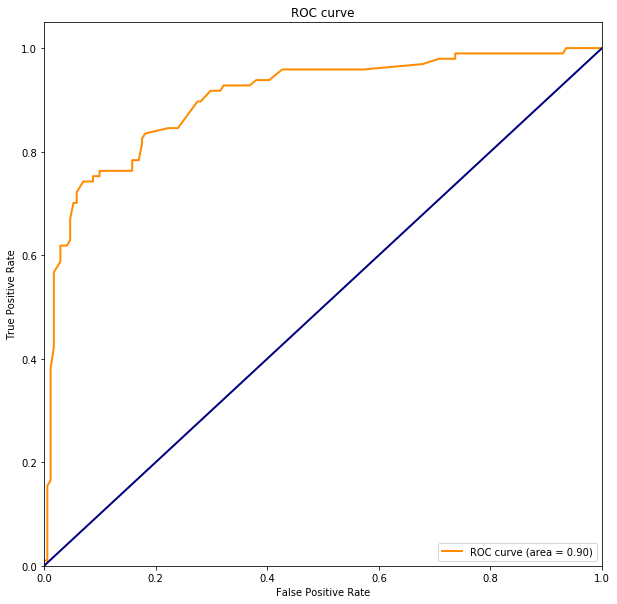

In [56]:
# GBM 커브 그래프 그리기
plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2)
# linestyle='—'
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

In [57]:
# forest 커브 그리기 
model = forest
pred_test = model.predict_proba(testX)
# X축, Y축 생성
fpr, tpr, _ = roc_curve(y_true=testY, y_score=pred_test[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

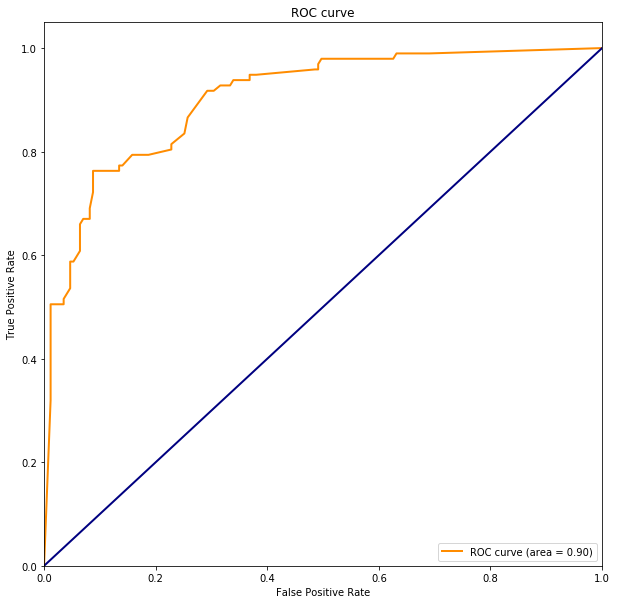

In [58]:
# forest 커브 그래프 그리기
plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2)
# linestyle='—'
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

---------------
## 4. 예측 데이터 평가 
-----------------
### 3) 특성 중요도

In [59]:
# 특성 중요도 

# 0 ~1 사이의 숫자로 -> 0은 전혀 사용 안 함 1은 완벽하게 타깃 클래스 예측 
print("특성 중요도:\n{}".format(forest.feature_importances_))

특성 중요도:
[0.18582956 0.16338635 0.17359625 0.14535645 0.3318314 ]


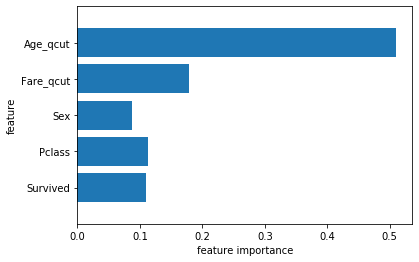

In [60]:
def plot_feature_importances_tai(model):
    n_features = trainX.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_df.columns)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_tai(gbrt)


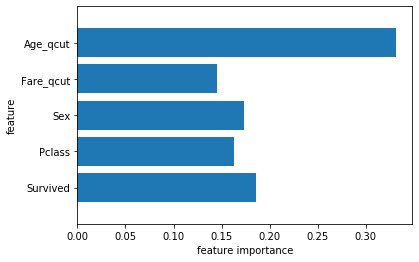

In [61]:
plot_feature_importances_tai(forest)

---------------
## 5. 결론
-----------------


### 1) 중요한 열 선별 :
#### - 상관관계를 파악한 후 필요하다고 생각되어지는 열 선별 
#### - Age, Fare, Pclass, Faily -> 관계가 있다고 여겨짐
----------------
### 2) Age 결측치 처리 시행착오 : 
#### - Pclass 별 Age 평균을 통해 결측치 처리
#### - 선형 회귀를 통한 결측치 예측 
#### - knn을 통한 예측
----------------
### 3) 5개의 모델 학습 후 평가 결과 평가
## **- 랜덤 포레스트 모델과 GBM이 정확도 85%와 ROC 커브 면적 0.9로 가장 적합하다고 판단!!!!!**